# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, linregress
from IPython.display import display#this helps put data into tables
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data on "Mouse ID"
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the combined data table for preview
display(combined_data.head())



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [141]:
# Calculate the number of unique mice in the combined data
num_unique_mice = combined_data["Mouse ID"].nunique()

print(f"Number of  mice: {num_unique_mice}")


Number of  mice: 249


In [142]:
# Find duplicate rows based on "Mouse ID" and "Timepoint"
duplicated_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get unique Mouse IDs from the duplicated rows
duplicate_mice_ids = duplicated_rows["Mouse ID"].unique()

print(f"Duplicate Mouse IDs based on 'Mouse ID' and 'Timepoint': {duplicate_mice_ids}")


Duplicate Mouse IDs based on 'Mouse ID' and 'Timepoint': ['g989']


In [143]:
# Filter the combined_data for rows where the "Mouse ID" is in the list of duplicate_mice_ids
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids)]

display(duplicate_mice_data)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [144]:
# Filter the combined_data for rows where the "Mouse ID" is NOT in the list of duplicate_mice_ids
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice_ids)]

display(clean_data.head())


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [145]:
# Calculate the number of unique mice in the clean data
num_unique_mice_clean = clean_data["Mouse ID"].nunique()

print(f"Number of unique mice in the clean DataFrame: {num_unique_mice_clean}")


Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [146]:
# Group by regimen
regimen_grouped = clean_data.groupby('Drug Regimen')

# Calculate the statistics
tumor_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
tumor_median = regimen_grouped['Tumor Volume (mm3)'].median()
tumor_variance = regimen_grouped['Tumor Volume (mm3)'].var()
tumor_std = regimen_grouped['Tumor Volume (mm3)'].std()
tumor_sem = regimen_grouped['Tumor Volume (mm3)'].sem()

# Assemble the statistics into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_std,
    'Tumor Volume SEM': tumor_sem
})

display(summary_stats)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [147]:
# Use aggregation to produce the summary statistics in a single line
summary_stats_agg = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

display(summary_stats_agg)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

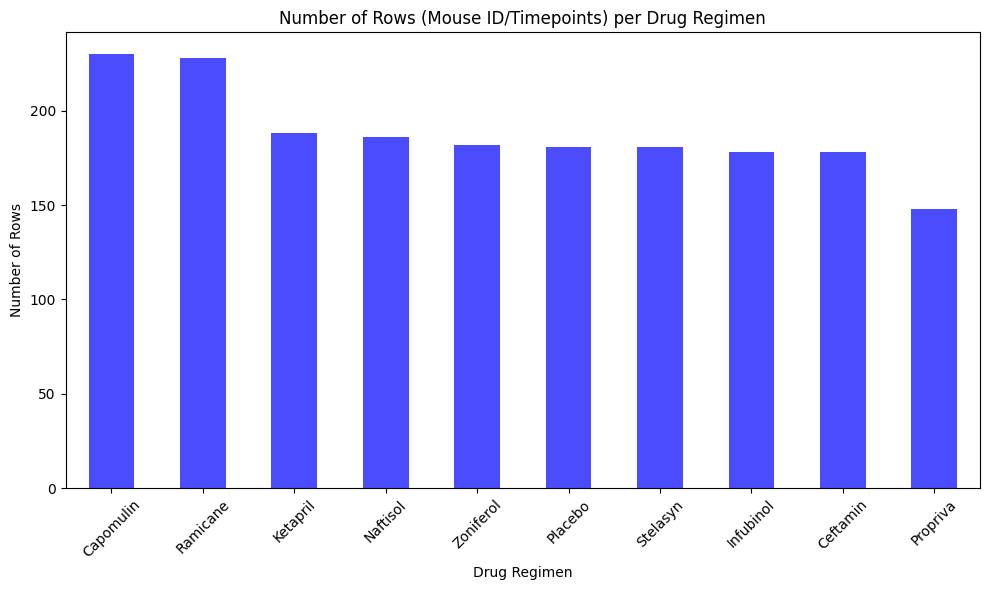

In [148]:
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Plot using pandas
regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))
plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


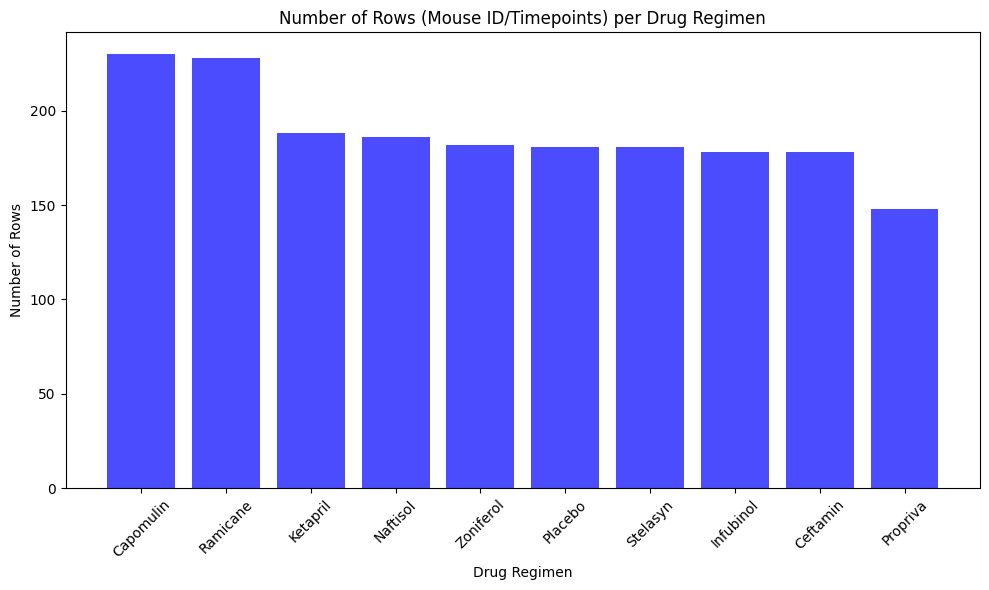

In [149]:
# Import necessary library
import numpy as np

# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Extract the names of the drug regimens and the corresponding counts
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values

# Plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, regimen_values, color='blue', alpha=0.7)
plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


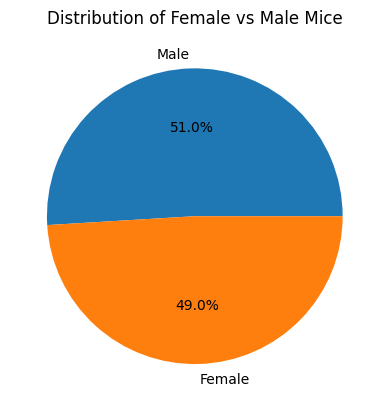

In [150]:
# Pie plot using pyplot
colors = ['blue', 'pink']
sex_counts = clean_data["Sex"].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.show()

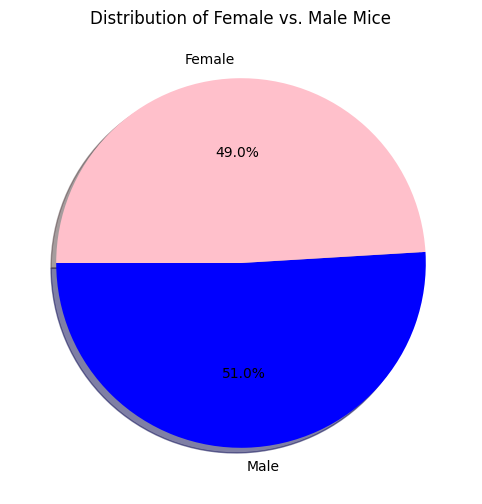

In [151]:
# Get counts of each gender
gender_counts = clean_data['Sex'].value_counts()

# Extract the names of the genders and the corresponding counts
labels = gender_counts.index
sizes = gender_counts.values
colors = ['blue', 'pink']

# Plot using pyplot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, shadow=True)
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [152]:
#Filter the data for the four treatments:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatments)]
#Determine the last timepoint for each mouse:
# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
#Merge the results with the original data to get the tumor volume at that last timepoint:
# Merge this group df with the original DataFrame
merged_data = pd.merge(last_timepoints, clean_data, on=["Mouse ID", "Timepoint"], how="left")

display(merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]])


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [153]:
# Put treatments into a list for for loop (and later for plot labels)
#i modified this code to make data reading more easy 

# Create empty list to fill with tumor vol data (for plotting)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_data[merged_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(subset)
    
    # Calculate the IQR and quantitatively check for outliers
    quartiles = subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"IQR for {drug}: {iqr}")
    
    # Determine upper and lower bounds to identify outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    if not outliers.empty:
        print(f"Outliers for {drug} are: {outliers}")
    else:
        print(f"No outliers detected for {drug}")
    print("---------------------------")


IQR for Capomulin: 7.781863460000004
No outliers detected for Capomulin
---------------------------
IQR for Ramicane: 9.098536719999998
No outliers detected for Ramicane
---------------------------
IQR for Infubinol: 11.477135160000003
Outliers for Infubinol are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
---------------------------
IQR for Ceftamin: 15.577752179999997
No outliers detected for Ceftamin
---------------------------


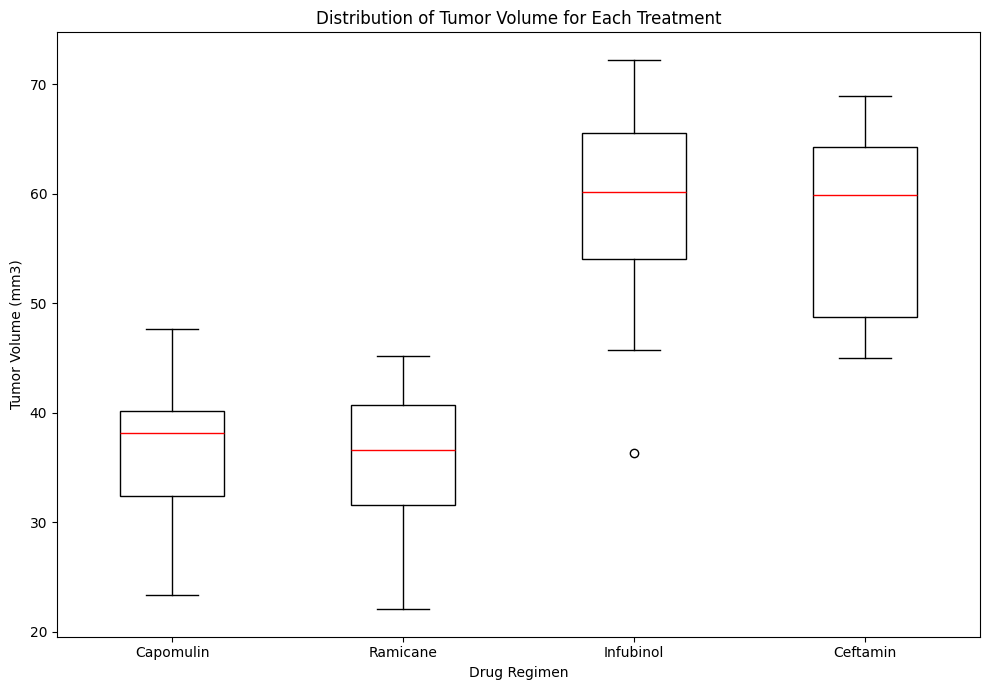

In [154]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Generate the box plot
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops=dict(color="red"), boxprops=dict(facecolor="white"))

# Set the title and axis labels
plt.title('Distribution of Tumor Volume for Each Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

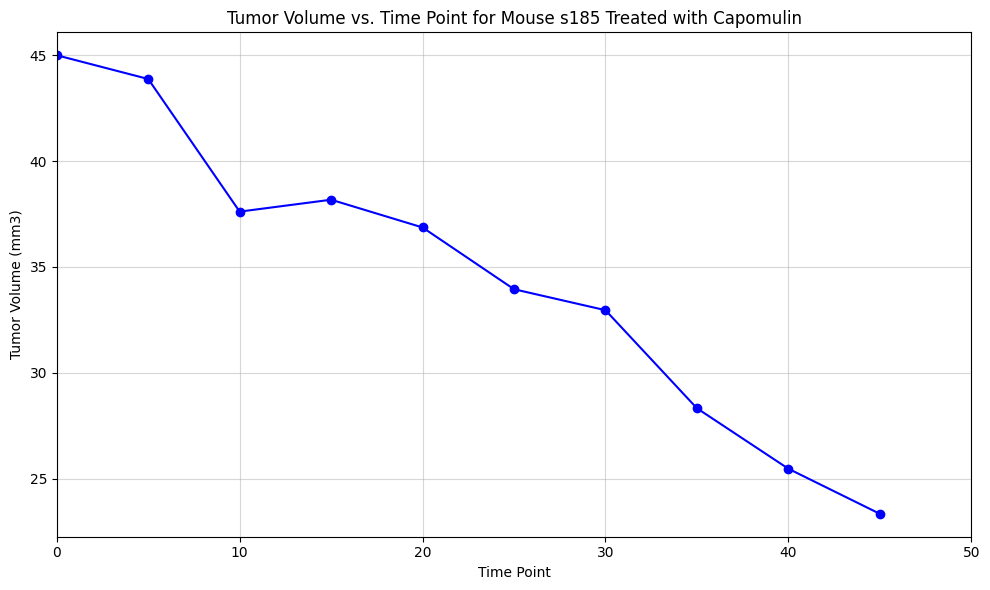

In [155]:
# Filter the data for mice treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Select the first mouse from this data
mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='blue')

# Set the title, axis labels, and other properties
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, single_mouse_data["Timepoint"].max() + 5)  # A bit of padding for better visualization
plt.grid(True, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


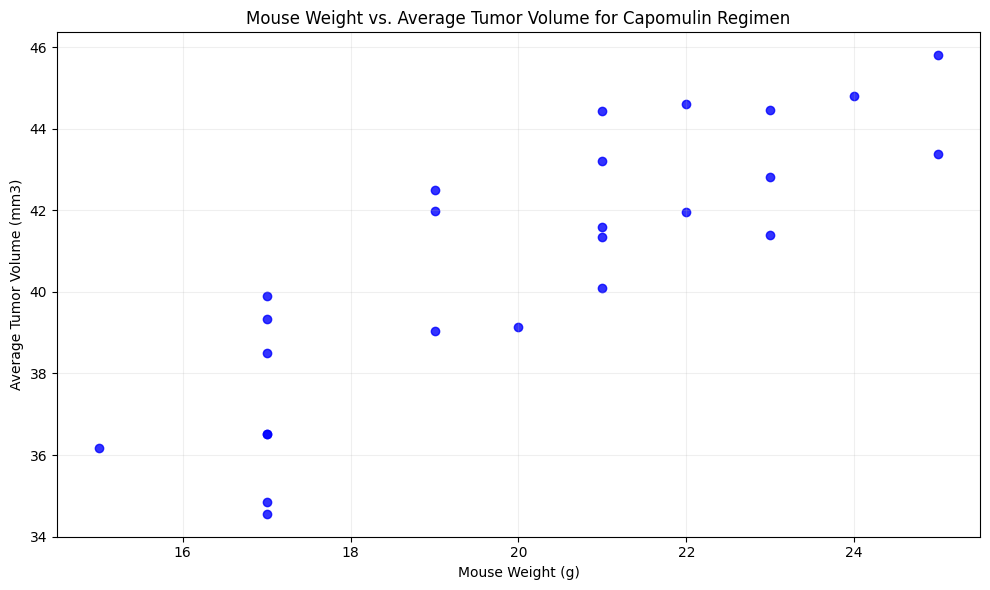

In [156]:
# Filter the data for mice treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Group by mouse ID and calculate average tumor volume and mouse weight
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', alpha=0.8)

# Set the title, axis labels, and other properties
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True, alpha=0.2)

# Show the plot
plt.tight_layout()
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


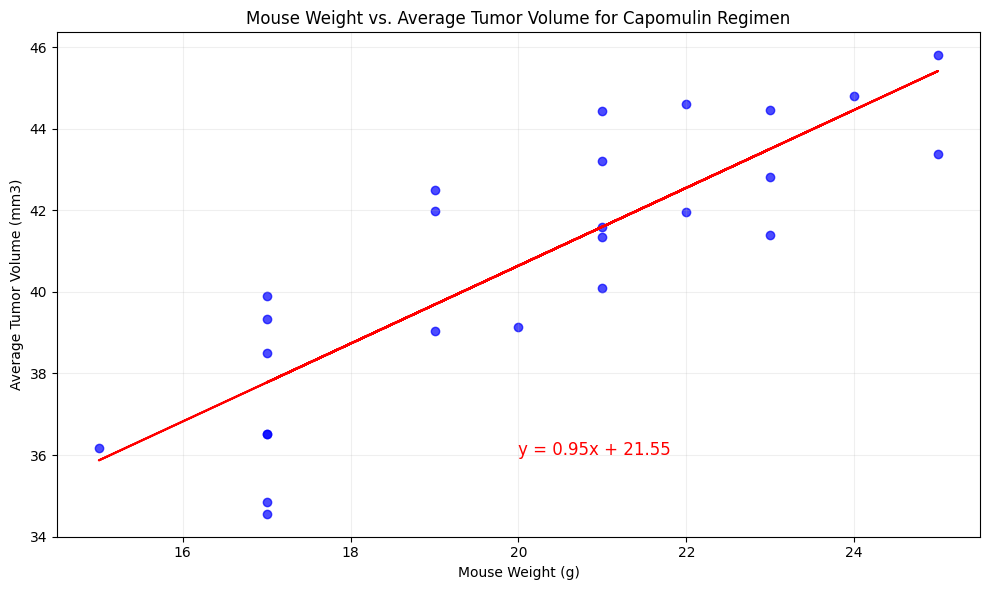

In [157]:


# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation_coefficient:.2f}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Generate the scatter plot with linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', alpha=0.7)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=12, color="red")

# Set the title, axis labels, and other properties
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True, alpha=0.2)

# Show the plot
plt.tight_layout()
plt.show()
